In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from trinta_testes_validacao_cruzada import TrintaTestes
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import display_function

%matplotlib inline
matplotlib.style.use('default')
plt.rcParams['figure.figsize'] = [6, 4]
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
# Funções para plotagem da matriz de confusão

def view_confusion_matrix(conf_matrix, classes=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if classes:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.0f'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

def plotConfusionMatrix(cnf_matrix, classes_):
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    if classes_:
        view_confusion_matrix(cnf_matrix, classes=classes_,
                      title='Confusion matrix, without normalization')
    else:
        view_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
        
    # Plot normalized confusion matrix
    plt.figure()
    if classes_:
        view_confusion_matrix(cnf_matrix, classes=classes_, normalize=True,
                      title='Normalized confusion matrix')
    else:
        view_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')

In [3]:
# Separação da base em previsores e classe

base = pd.read_csv('dados_meio_tempo_com_odds.csv').drop(['Unnamed: 0'], axis=1).sample(frac=1).reset_index(drop=True)

previsores = base.iloc[:, 0:35].values
classe = base.iloc[:, 35].values

classes_alvo = ['Visitante', 'Empate', 'Mandante']

# apenas para visualizar em forma de dataframe
classe_df = pd.DataFrame(classe)
previsores_df = pd.DataFrame(previsores)

## Pré-processamento dos dados

In [4]:
# transformando variáveis categóricas em numéricas usando o LabelEncoder

# para previsores
labelencoder_X = LabelEncoder()
previsores[:, 0] = labelencoder_X.fit_transform(previsores[:, 0])
previsores[:, 1] = labelencoder_X.fit_transform(previsores[:, 1])
previsores[:, 31] = labelencoder_X.fit_transform(previsores[:, 31])


# para classe LabelEncoder não costuma ser necessário
'''labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)'''

pass

In [ ]:
# transformando variáveis categóricas em numéricas e tirando o peso dos valores após a transformação
# através do OneHotEncoder

column_tranformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [0, 1, 31])],remainder='passthrough')
previsores = column_tranformer.fit_transform(previsores)

# apenas para visualizar em forma de dataframe
previsores_onehotencoder_df = pd.DataFrame(previsores)

In [ ]:
# fazendo escalonamento das variáveis (normalização) através do StandardScaler

scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# apenas para visualizar em forma de dataframe
previsores_StandardScaler_df = pd.DataFrame(previsores)

In [ ]:
# chamando método para fazer treinamento e classificação com trinta testes
# e validação cruzada usando StratifiedKFold
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

classificador = DecisionTreeClassifier()
decision_tree = TrintaTestes(classificador, previsores, classe)

In [ ]:
print(decision_tree.acuracia())

In [ ]:
# chamando método para fazer treinamento e classificação com trinta testes
# e validação cruzada usando StratifiedKFold
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

classificador = GaussianNB()
naive_bayes = TrintaTestes(classificador, previsores, classe)

In [ ]:
print(naive_bayes.acuracia())

In [5]:
# chamando método para fazer treinamento e classificação com trinta testes
# e validação cruzada usando StratifiedKFold
# ODDS

from odds import OddsClassifier

classificador = OddsClassifier() 
odds = TrintaTestes(classificador, previsores, classe)

In [6]:
print(odds.acuracia().mean())

0.5541646334378993


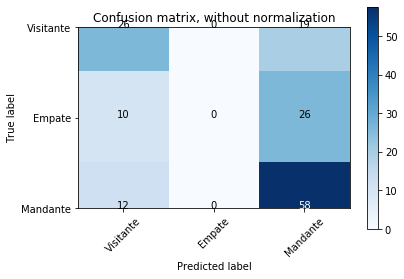

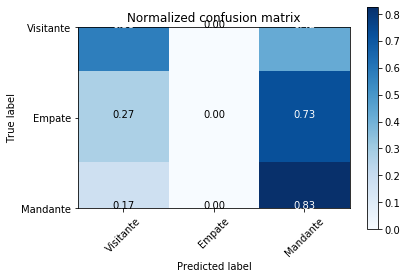

In [10]:
plotConfusionMatrix(odds.matrizConfusao(), classes_alvo)

In [ ]:
# chamando método para fazer treinamento e classificação com trinta testes
# e validação cruzada usando StratifiedKFold
# KNN

from sklearn.neighbors import KNeighborsClassifier

classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn = TrintaTestes(classificador, previsores, classe)

In [ ]:
print(knn.acuracia().mean())

In [ ]:
# chamando método para fazer treinamento e classificação com trinta testes
# e validação cruzada usando StratifiedKFold
# RNA

from sklearn.neural_network import MLPClassifier

classificador = MLPClassifier(verbose = True, max_iter = 1000,
                      tol = 0.000010, solver='adam',
                      hidden_layer_sizes=(100), activation = 'relu',
                      batch_size=200, learning_rate_init=0.001)
rna = TrintaTestes(classificador, previsores, classe)

In [ ]:
# chamando método para fazer treinamento e classificação com trinta testes
# e validação cruzada usando StratifiedKFold
# SVM

from sklearn.svm import SVC

classificador = SVC(kernel = 'rbf', random_state = 1, C = 2.0)
svm = TrintaTestes(classificador, previsores, classe)

In [ ]:
# chamando método para fazer treinamento e classificação com trinta testes
# e validação cruzada usando StratifiedKFold
# Random Forest

from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest = TrintaTestes(classificador, previsores, classe)

In [ ]:
print(random_forest.acuracia().mean())

In [ ]:
# VERIFICANDO ATRIBUTOS MAIS IMPORTANTES PARA O RANDOM FOREST

# se a variável "classificador" for sobrescrita por outro algoritmo eu ainda garanto que aqui é objeto do Random Forest
classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
classificador.fit(previsores,classe)

# imprimindo valores de importância independente da ordem e sem dar nomes aos atributos
#print(classificador.feature_importances_)

# imprimindo valores dando nome aos atributos e em ordem 
previsores_df = pd.DataFrame(previsores)
columns_ = base.iloc[:, 0:35].columns
caracteristicas_importantes = pd.DataFrame(classificador.feature_importances_,
                                            index = columns_,
                                            columns = ['importance']).sort_values('importance', ascending = False)
print(caracteristicas_importantes)

# imprimindo valores com nome dos atributos, em ordem e através de gráfico em barras
caracteristicas_importantes.plot(kind='bar')

In [ ]:
# Acurácia de trinta testes para cada algoritmo abaixo
random_forest_df = pd.DataFrame(random_forest.acuracia()).rename(columns={0:'Random Forest'})
svm_df = pd.DataFrame(svm.acuracia()).rename(columns={0:'SVM'})
knn_df = pd.DataFrame(knn.acuracia()).rename(columns={0:'KNN'})
naive_bayes_df = pd.DataFrame(naive_bayes.acuracia()).rename(columns={0:'Naive Bayes'})
decision_tree_df = pd.DataFrame(decision_tree.acuracia()).rename(columns={0:'Árvore de Decisão'})

# juntando todos os dataframes acima em um só 
algoritmos_boxplot_df = pd.concat([random_forest_df,svm_df,knn_df,naive_bayes_df,decision_tree_df], axis=1, join='inner')

display(algoritmos_boxplot_df)

In [ ]:
# BOXPLOT DOS RESULTADOS 

random_forest.acuracia()
decision_tree.acuracia()
svm.acuracia()
naive_bayes.acuracia()
knn.acuracia()

fig = plt.figure(figsize=(8,5))
algoritmos_boxplot_df.boxplot(column=['Random Forest','SVM','KNN','Naive Bayes','Árvore de Decisão'])
plt.title('Algoritmos de Machine Learning')
plt.ylabel('Acurácia', fontsize=12, color='black')
plt.show()